In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
data1=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2021.xlsx")
data2=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2020.xlsx")
data3=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2019.xlsx")
data4=pd.read_excel(r"C:\Users\jeyaagastin\OneDrive\Desktop\Mini_projects\gold_forecast_project\dataset\gold2018.xlsx")

In [28]:
#data1.head()
#data2.head()
#data3.head()
#data4.head()

In [3]:
data=pd.concat([data1,data2,data3,data4])
data=data.sort_values(by='DATE', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [4]:
data.dtypes


DATE     datetime64[ns]
Price             int64
dtype: object

In [22]:
data.head()

,DATE,Price,Year,Month
38,2018-10-12,31876,2018,10
37,2018-10-15,32264,2018,10
36,2018-10-16,32109,2018,10
35,2018-10-17,32043,2018,10
34,2018-10-18,32037,2018,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 758 entries, 38 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    758 non-null    datetime64[ns]
 1   Price   758 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.8 KB


In [6]:
data.describe()

,DATE,Price
count,758,758.000000
mean,2020-05-19 07:28:20.263852288,43096.828496
min,2018-10-12 00:00:00,30289.000000
25%,2019-08-01 06:00:00,36082.500000
50%,2020-05-23 12:00:00,45162.000000
75%,2021-03-11 18:00:00,48660.000000
max,2021-12-03 00:00:00,56834.000000
std,NaN,6789.493745


### Check for normality in data

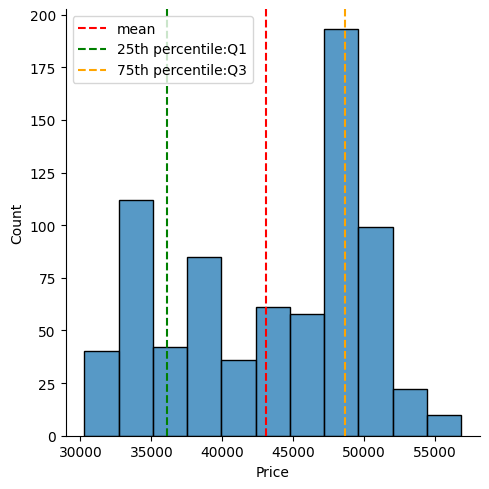

In [7]:
sns.displot(data['Price'])
plt.axvline(x=np.mean(data['Price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

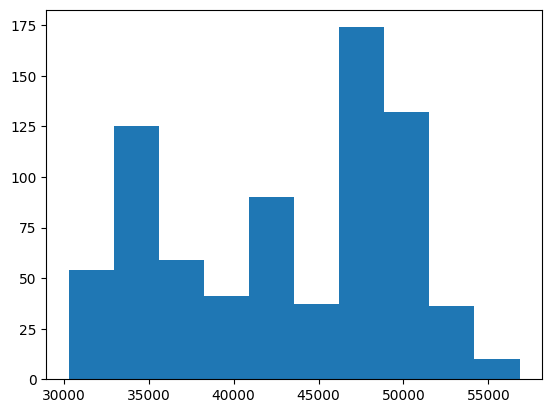

In [8]:
plt.hist(data["Price"])
plt.show()

### Find Outliers in data

<Axes: >

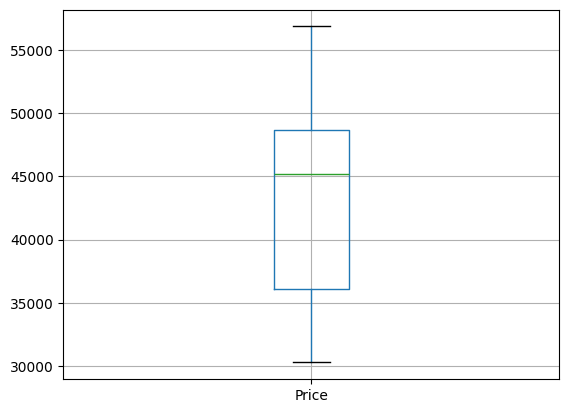

In [9]:
data.boxplot(column=["Price"])

### Check Trend in data

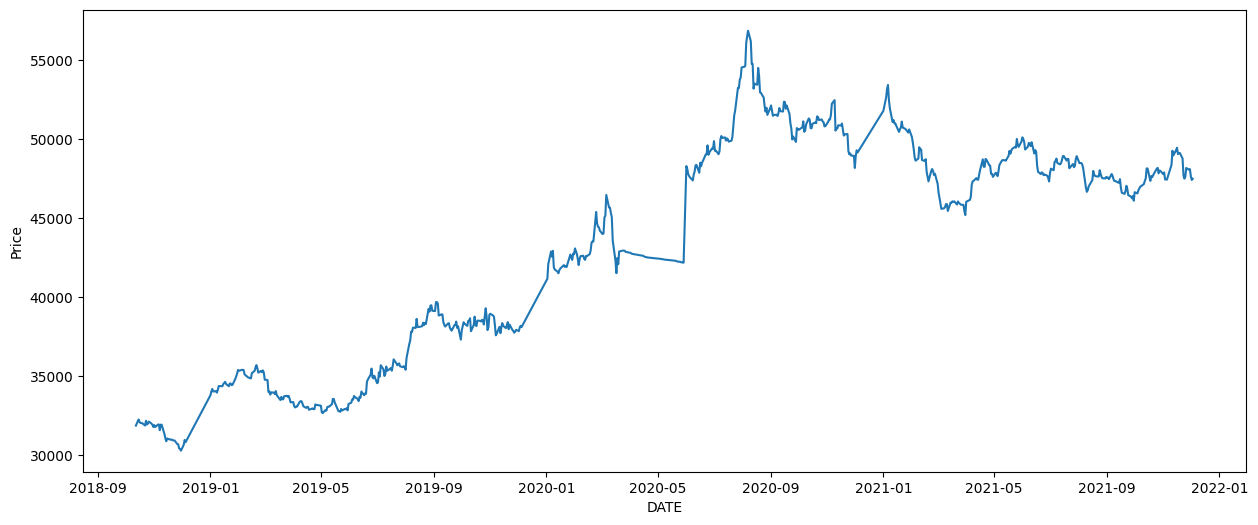

In [10]:
plt.figure(figsize=(15,6))
series1=sns.lineplot(x='DATE',y='Price',data=data)
plt.show(series1)

#### This data have irregular trend with combination of linear & constant treand over the time

### Check trend using plotly lib

In [14]:
#import plotly.graph_objects as go
#fig = go.Figure(data=go.Scatter(x=data['DATE'],y=data['Price'], mode='lines'))
#fig.show()

##### mode='lines', If we set the mode='markers', then we’ll have a regular scatter (dots) plot. There’s also another mode='lines+markers' that shows both dots and lines
These charts are interactive, you can hover the mouse over the chart and see the price details

### Using calplot (Visualization like GITHUB)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


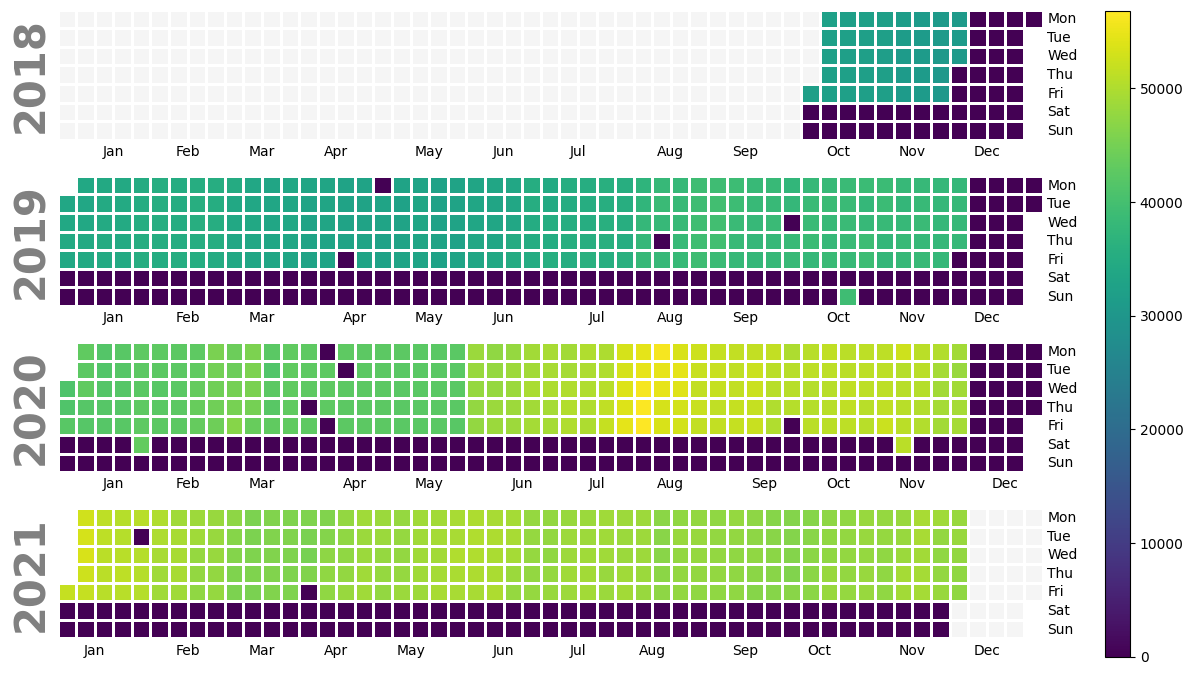

In [17]:
import calplot
#assigning date column as its index
df=data
df=df.set_index('DATE')

#visualize time series

calplot.calplot(df['Price'],edgecolor=None)
plt.show()

### Trend & Seasonality using Seaborn lib

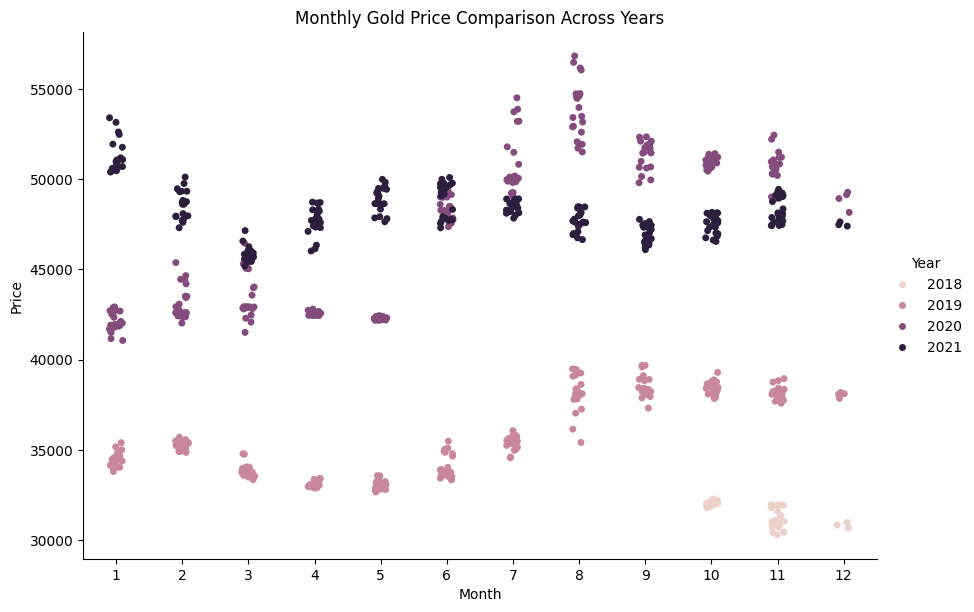

In [21]:
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
sns.catplot(data = data, x ="Month", y = "Price", hue = "Year", height=6, aspect=1.5)
plt.title("Monthly Gold Price Comparison Across Years")
plt.show()

#### Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [29]:
df=data
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['weekday'] = df['DATE'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = data[['Price','Year']].groupby(by='Year').sum().reset_index()

df_year

,Year,Price
0,2018,1226479
1,2019,8572844
2,2020,11362886
3,2021,11505187


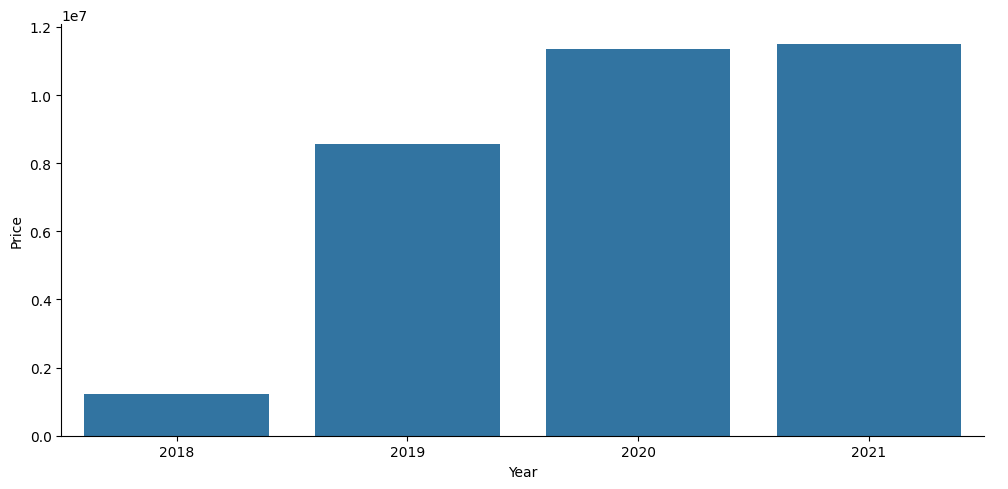

In [31]:
sns.catplot(x='Year',y='Price',data=df_year,kind='bar',aspect=2)

### Monthly & Yeary Gold Price (TREND & SEASONALITY)

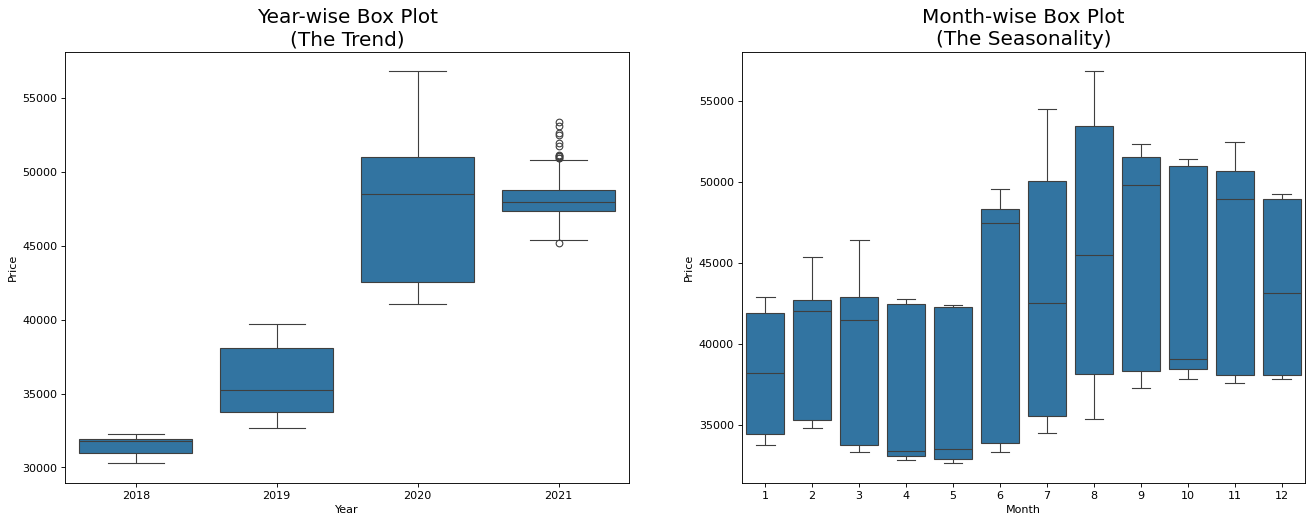

In [38]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Price', data=data, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=data.loc[~data.Year.isin([2018, 2021]), :],ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

##### Inference: From the number of sales vs. year plot, we can infer an increasing trend over the years. The aggregate number of sales has increased from approximately 32000 in 2018 to slightly over 52000 in 2020. A clear trend is captured by the lineplot above

### Weekly Gold Price

[Text(0.5, 1.0, 'Weekly Gold Price')]

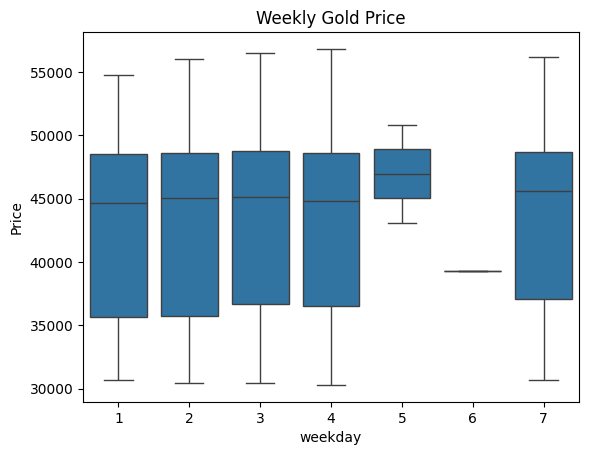

In [40]:
plot = sns.boxplot(x='weekday', y='Price', data=df)
plot.set(title='Weekly Gold Price')

### Time Series Decomposition Plot

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

data=pd.concat([data1,data2,data3,data4])
data=data.sort_values(by='DATE', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('DATE')

df1=data.sort_values(by='DATE', ascending=True)
matplotlib.rc('figure', figsize=(7, 7))
decompose = seasonal_decompose(df1.Price, period=10, model='additive')
decompose.plot()
plt.show() 

ModuleNotFoundError: No module named 'statsmodels'

 Determine Error, Trend and Seasonality An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the thre components.

 Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

 Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

 Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

### Check Stationarity of a Time Series

In [42]:
data=pd.concat([data1,data2,data3,data4])
data=data.sort_values(by='DATE', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('DATE')
data

,Price
DATE,
2018-10-12,31876
2018-10-15,32264
2018-10-16,32109
2018-10-17,32043
2018-10-18,32037
...,...
2021-11-29,48042
2021-11-30,48085
2021-12-01,47633


In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

ModuleNotFoundError: No module named 'statsmodels'

In [44]:
test_stationarity(data)

NameError: name 'test_stationarity' is not defined

 Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series